## Hometask 4:
1. Choose one linear and one non-linear dimension reduction method
2. Run them on your data (It is preferable to use seaborn and plotly to visualize results)
3. Justify the choice of the number of components / dimensions and explain them


In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_csv('data_cleaned.csv')
df

,Unnamed: 0.1,smiles,Unnamed: 0,A,B,mu,alpha,gap,r2,zpve,...,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius
0,0,C#CCCC1CCOC1,0,5.49143,0.66895,1.3066,84.81,0.2954,1781.5968,0.182117,...,0,0,0,0,0.125000,0.080000,0.055556,0.0,0.025000,3
1,1,COC1CCC2OC2C1,1,3.54789,1.10474,2.4615,78.34,0.3311,1304.8075,0.183520,...,0,1,0,0,0.276111,0.142500,0.000000,0.0,0.069028,3
2,2,c1(n[nH]nn1)N,2,10.01649,3.90958,2.3205,40.14,0.2194,425.7517,0.064539,...,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,2
3,3,CCC1=CCCCC1=O,3,2.66373,1.30548,3.1960,86.47,0.1913,1296.1131,0.183451,...,0,0,0,0,0.262222,0.062500,0.000000,0.0,0.052444,3
4,4,CN1CCC(=N)OC1=O,4,2.99190,1.44371,4.1212,71.99,0.2562,1143.1487,0.137285,...,0,0,0,0,0.413333,0.000000,0.000000,0.0,0.103333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,19995,Cc1c(cc2n1CC2)O,19995,3.05973,1.47401,1.8013,81.84,0.2206,1155.1966,0.147997,...,0,1,0,0,0.236111,0.000000,0.000000,0.0,0.078704,3
19976,19996,c1cnc(c(n1)N)N,19996,3.36848,2.44058,1.9694,69.29,0.1831,818.9922,0.111228,...,0,0,0,0,0.222222,0.000000,0.000000,0.0,0.111111,3
19977,19997,C#CC1C=CCC11CN1,19997,2.29264,1.74451,1.0929,82.46,0.2542,1099.4073,0.147825,...,0,0,0,0,0.250000,0.000000,0.000000,0.0,0.062500,2
19978,19998,c1c(noc1N=CN)N,19998,7.42838,0.81722,3.3354,80.23,0.1842,1461.8938,0.113544,...,0,0,0,0,0.205000,0.135556,0.000000,0.0,0.041000,3


In [37]:
# Нормализация
smiles = df['smiles']
gap = df['gap']
data = df.drop(columns = ['gap', 'smiles', 'Unnamed: 0', 'Unnamed: 0.1'])

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

### PCA

In [94]:
# Реализуем PCA с дисперсией 95%
pca = PCA(n_components = 0.95)
reduced = pca.fit_transform(data_norm)
n_components = reduced.shape[1]

print('Начальная размерность: ',data_norm.shape)
print('Уменьшенная размерность: ',reduced.shape)
print("Объясненная дисперсия: ", pca.explained_variance_ratio_.sum())
print('Оптимальное количество компонент для объяснения 95% дисперсии: ', n_components)

Начальная размерность:  (19980, 173)
Уменьшенная размерность:  (19980, 62)
Объясненная дисперсия:  0.951616582352334
Оптимальное количество компонент для объяснения 95% дисперсии:  62


In [49]:
pca = PCA(n_components=n_components)

transform_data = pca.fit_transform(data_norm)

print(transform_data)

[[-0.52536172  0.23362988  0.61366394 ... -0.06552729 -0.14186017
   0.00275072]
 [-0.83162092 -0.39526527 -0.12052197 ...  0.06801259  0.01069702
   0.04866484]
 [ 1.08454734  0.53275127 -0.42061888 ... -0.05964764 -0.03565249
   0.09236375]
 ...
 [-0.19060171  0.58627827 -0.05767409 ... -0.0294108  -0.04124773
  -0.00796003]
 [ 1.37573765  0.29183862 -0.23181388 ...  0.12961558  0.06059584
   0.25393354]
 [-0.43972482  0.66761472  0.57536071 ...  0.02334858 -0.05312598
  -0.10313661]]


In [50]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df.insert(0, 'gap', gap)
transformed_df

,gap,0,1,2,3,4,5,6,7,8,...,52,53,54,55,56,57,58,59,60,61
0,0.2954,-0.525362,0.233630,0.613664,-0.421964,-0.194887,-0.420678,0.612613,0.184284,-0.016185,...,-0.010684,0.027883,-0.030800,-0.036615,0.042994,0.059780,-0.108926,0.092275,0.127610,-0.005231
1,0.3311,-0.831621,-0.395265,-0.120522,-0.446223,-0.024741,-0.516138,0.153248,-0.378456,-0.597175,...,-0.057810,-0.094413,-0.069173,0.095432,0.079414,0.105598,-0.113354,-0.048885,-0.021437,0.054858
2,0.2194,1.084547,0.532751,-0.420619,0.406518,-0.411681,-0.175293,-0.123170,0.059226,0.021244,...,-0.001044,0.256808,0.099236,-0.026956,-0.094995,0.216505,0.065887,0.053806,0.018506,0.123316
3,0.1913,-0.127547,0.579801,0.384783,-0.363102,0.749839,0.188314,0.165182,-0.103140,0.276988,...,-0.049526,-0.028581,-0.088463,0.079196,0.071116,-0.013598,-0.012196,0.113090,0.032227,0.100808
4,0.2562,0.548867,-0.429819,-0.058878,-0.327303,0.232049,0.494449,-0.215186,-0.226282,0.007837,...,0.019309,-0.066799,-0.051241,-0.166201,-0.096702,-0.070711,-0.138920,0.008623,-0.146344,-0.049094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,0.2206,0.102975,0.498739,-0.409944,-0.205051,-0.090229,-0.150369,-0.369043,-0.585646,-0.431531,...,0.041416,-0.167506,-0.149808,0.132365,-0.037008,-0.261607,-0.089344,-0.118442,-0.105629,-0.148377
19976,0.1831,1.476990,0.693056,-0.525971,0.142898,-0.599034,-0.156282,-0.239638,-0.060772,0.015982,...,-0.034824,-0.111949,-0.172810,-0.042170,-0.073810,0.058373,0.161844,-0.145544,0.033690,0.126089
19977,0.2542,-0.190602,0.586278,-0.057674,0.131782,-0.238150,-0.079527,0.439006,-0.033867,0.111113,...,0.062412,-0.121150,-0.018980,-0.010264,0.086839,-0.134685,-0.055094,0.037831,0.020751,-0.035224
19978,0.1842,1.375738,0.291839,-0.231814,-0.015830,-0.513420,-0.067617,0.126856,-0.048664,0.119604,...,-0.184303,-0.053620,0.200894,-0.025964,0.077276,-0.034874,0.056353,-0.144789,-0.016424,0.264122


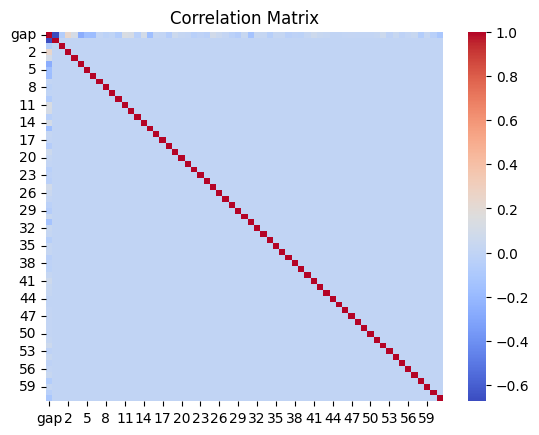

In [63]:
# Построение матрицы корреляции
correlation_matrix = transformed_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Изначально мы задали желаемый уровень объясненной дисперсии (95%). Выбор количества главных компонент был основан на этом значении. Выбор более низкого уровня объясненной дисперсии может привести к большей потере информации, что может негативно сказаться на качестве последующего анализа или обучения моделей. В связи с этим в дальнейшем уменьшении размерности необходимости нет. 

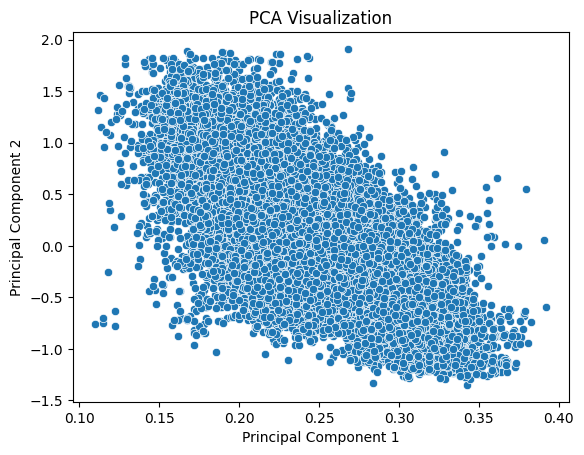

In [70]:
# Визуализация данных
sns.scatterplot(x=transformed_df.iloc[:, 0], y=transformed_df.iloc[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

Проведем оценку важности дескрипторов.

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
smiles = df['smiles']
df = df.drop(columns = ['smiles'])

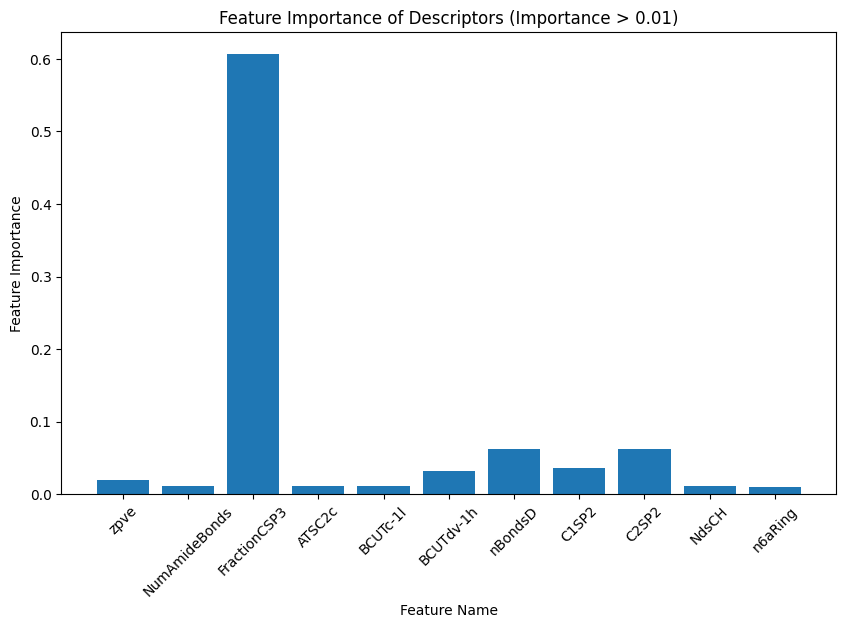

In [76]:
# Важность дескрипторов
grad = GradientBoostingRegressor()
grad.fit(df.loc[:, df.columns!='gap'], df['gap'])

# Важность признаков
feature_importance = grad.feature_importances_

# Названия дескрипторов
feature_names = df.columns[df.columns != 'gap']

# Фильтрация признаков с важностью больше 0.01
selected_features = [feature_names[i] for i, importance in enumerate(feature_importance) if importance > 0.01]
selected_importance = [importance for i, importance in enumerate(feature_importance) if importance > 0.01]

# Создание графика для визуализации важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), selected_importance, align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)  # Поворот названий дескрипторов для лучшей читаемости
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Descriptors (Importance > 0.01)')
plt.show()

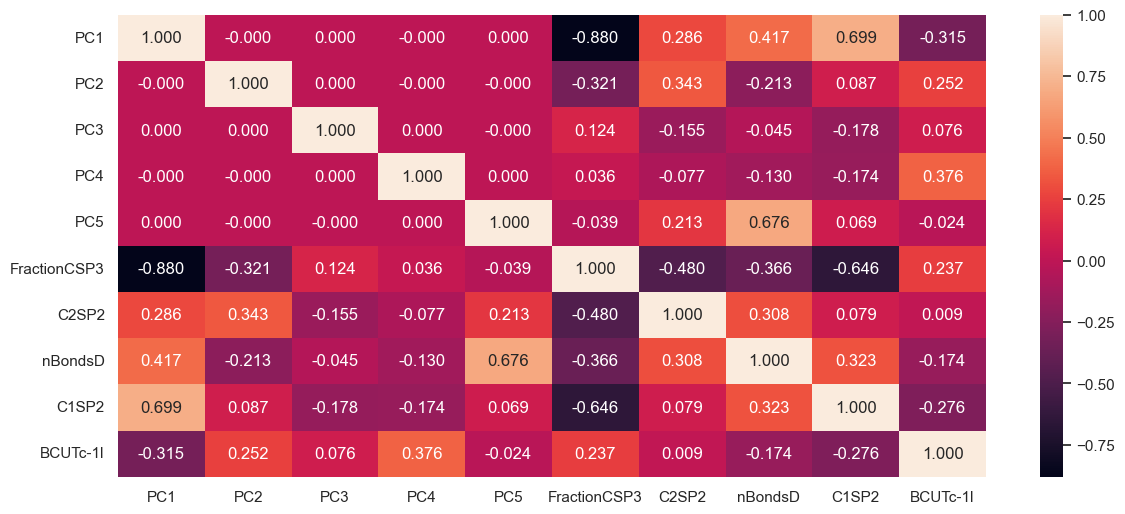

<Figure size 2800x1800 with 0 Axes>

In [83]:
# Объяснение главных компонент
df_pc = pd.DataFrame(data = transformed_data, columns = [f'PC{i}' for i in range(1,63)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3','PC4','PC5']], df[['FractionCSP3', 'C2SP2', 'nBondsD', 'C1SP2', 'BCUTc-1l']]], axis=1)

# Compute the correlations between the original data and PCs
corr_Matrix = pd.DataFrame.corr(df_col)

# Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corr_Matrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

Матрица корреляции показывет, что наблюдается высокая обратная корреляция PC1 с  дескриптором FractionCSP3 (доля sp3 гибридизованных атомов углерода). При этом FractionCSP3, в целом, имеет значительно большее влияние, чем другие дескрипторы. Также довольно высока корреляция PC1 с  дескриптором C1SP2 (наличие атома углерода, имеющего одну связь и находящегося в sp2 гибридизации).

### Kernel PCA

In [88]:
#Perform kernel PCA with sigmoid kernel
sigmoid_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma=0.01)
X_sigmoid = sigmoid_pca.fit_transform(data_norm)

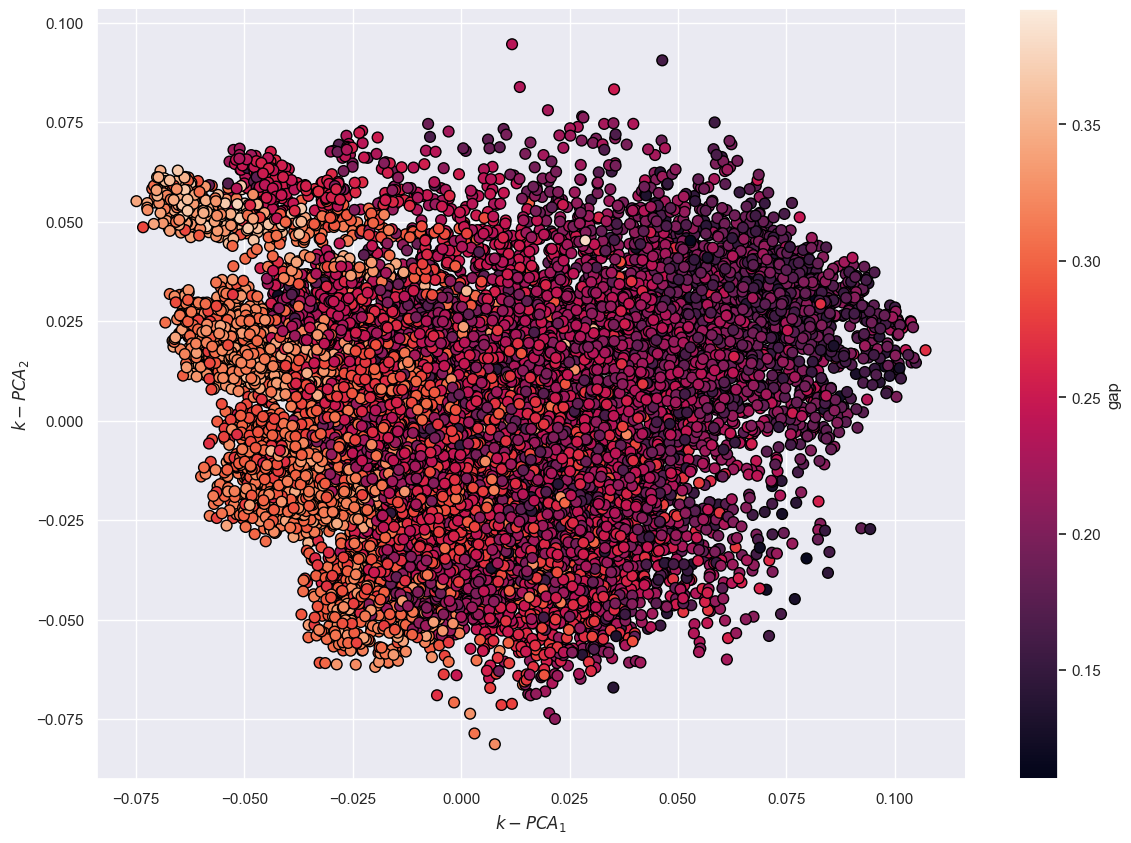

In [89]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c = gap, s=60, edgecolors='black')
colorbar = fig.colorbar(scatter, ax=ax, label = "gap")
plt.xlabel(r'$k-PCA_1$')
plt.ylabel(r'$k-PCA_2$')
sns.despine()
plt.show()

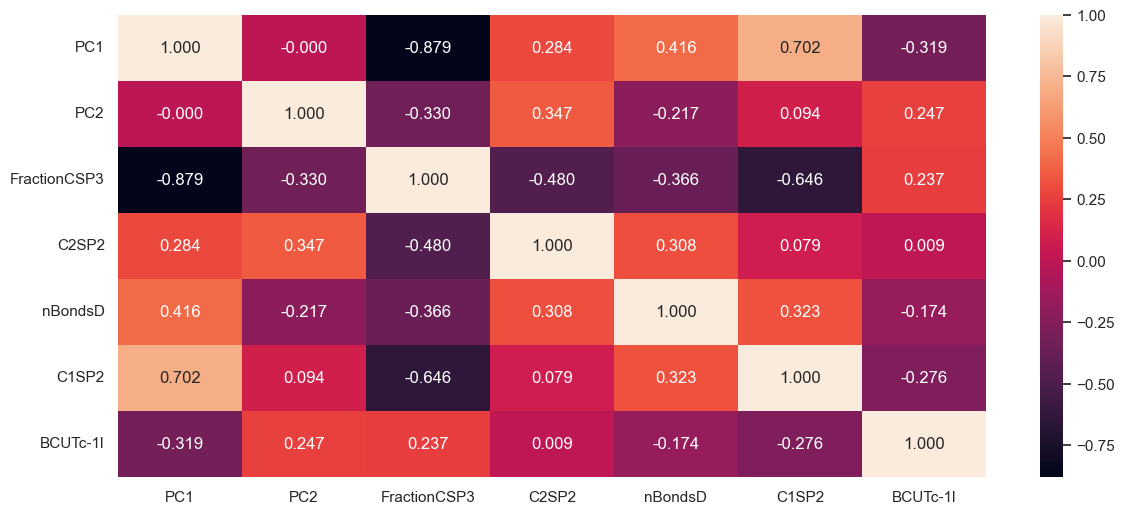

<Figure size 2800x1800 with 0 Axes>

In [96]:
# Объяснение главных компонент
df_pc = pd.DataFrame(data = X_sigmoid, columns = [f'PC{i}' for i in range(1,3)])
df_col = pd.concat([df_pc[['PC1','PC2']], df[['FractionCSP3', 'C2SP2', 'nBondsD', 'C1SP2', 'BCUTc-1l']]], axis=1)

# Compute the correlations between the original data and PCs
corr_Matrix = pd.DataFrame.corr(df_col)

# Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corr_Matrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

Корреляции главных компонент линейного и нелинейного методов PCA достаточно близки.